In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Задание 1

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
# сгенерируем набор данных
X, y, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                      noise = 5, coef = True, random_state = 2)

In [3]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

#### Обучим линейную модель при помощи градиентного спуска:

In [4]:
np.random.seed(1234)

# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счётчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord = 2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(X, new_w, y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 26.4259


#### Обучим линейную модель при помощи стохастического градиентного спуска:

In [5]:
np.random.seed(1234)

# инициализируем начальный вектор весов
w_sgd = np.zeros(2)

# список векторов весов после каждой итерации
w_list_sgd = [w_sgd.copy()]

# список значений ошибок после каждой итерации
errors_sgd = []

# шаг градиентного спуска
eta_sgd = 0.01

# максимальное число итераций
max_iter_sgd = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist_sgd = 1e-8

# зададим начальную разницу весов большим числом
weight_dist_sgd = np.inf

# счётчик итераций
iter_num_sgd = 0

# ход стохастического градиентного спуска
while weight_dist_sgd > min_weight_dist_sgd and iter_num_sgd < max_iter_sgd:
    
    # генерируем случайный индекс объекта выборки
    train_ind_sgd = np.random.randint(X.shape[0])
    
    new_w_sgd = w_sgd - 2 * eta_sgd * np.dot(X[train_ind_sgd].T, (np.dot(X[train_ind_sgd], w_sgd) - y[train_ind_sgd])) / y.shape[0]

    weight_dist_sgd = np.linalg.norm(new_w_sgd - w_sgd, ord = 2)
    
    w_list_sgd.append(new_w_sgd.copy())
    errors_sgd.append(mserror(X, new_w_sgd, y))
    
    iter_num_sgd += 1
    w_sgd = new_w_sgd
    
w_list_sgd = np.array(w_list_sgd)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_sgd[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 457.0203


#### Визуализируем изменение функционала ошибки

Text(0, 0.5, 'MSE')

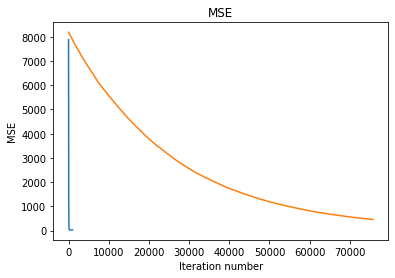

In [6]:
plt.plot(range(len(errors)), errors)
plt.plot(range(len(errors_sgd)), errors_sgd)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [7]:
len(errors)

986

In [8]:
len(errors_sgd)

75746

In [9]:
difference = round(len(errors_sgd) / len(errors))
difference

77

In [10]:
print(f'Соответственно, скорость сходимости градиентного спуска превышает скорость сходимости стохастического градиентного спуска в {difference} раз.')

Соответственно, скорость сходимости градиентного спуска превышает скорость сходимости стохастического градиентного спуска в 77 раз.


### Задание 2

Модифицировать решение первого задания путём добавления L2-регуляризации и сравнить результаты.

In [11]:
np.random.seed(1234)

# инициализируем начальный вектор весов
w_l2 = np.zeros(2)

# список векторов весов после каждой итерации
w_list_l2 = [w_l2.copy()]

# список значений ошибок после каждой итерации
errors_l2 = []

# шаг градиентного спуска
eta_l2 = 0.01

# максимальное число итераций
max_iter_l2 = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist_l2 = 1e-8

# зададим начальную разницу весов большим числом
weight_dist_l2 = np.inf

# счётчик итераций
iter_num_l2 = 0

# зададим коэффициент регуляризации
lambda_ = 1e-4

# ход стохастического градиентного спуска с L2-регуляризацией
while weight_dist_l2 > min_weight_dist_l2 and iter_num_l2 < max_iter_l2:
    
    # генерируем случайный индекс объекта выборки
    train_ind_l2 = np.random.randint(X.shape[0])
    
    new_w_l2 = w_l2 - eta_l2 * (2 * np.dot(X[train_ind_l2].T, (np.dot(X[train_ind_l2], w_l2) - y[train_ind_l2])) / y.shape[0] + lambda_ * w_l2)
        
    weight_dist_l2 = np.linalg.norm(new_w_l2 - w_l2, ord = 2)
    
    w_list_l2.append(new_w_l2.copy())
    errors_l2.append(mserror(X, new_w_l2, y))
    
    iter_num_l2 += 1
    w_l2 = new_w_l2
    
w_list_l2 = np.array(w_list_l2)

print(f'В случае использования L2-регуляризации функционал ошибки составляет {round(errors_l2[-1], 4)}')

В случае использования L2-регуляризации функционал ошибки составляет 270.5771


Text(0, 0.5, 'MSE')

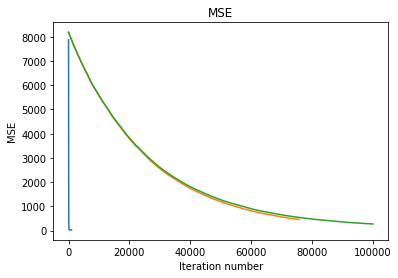

In [12]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.plot(range(len(errors_sgd)), errors_sgd)
plt.plot(range(len(errors_l2)), errors_l2)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [13]:
len(errors_sgd)

75746

In [14]:
len(errors_l2)

100000

In [15]:
difference_l2 = len(errors_l2) / len(errors_sgd)
difference_l2

1.3202017268238586

Использовать L2-регуляризацию полезно, поскольку функционал ошибки ниже, чем если взять обычный стохастический градиентный спуск (примерно в 2 раза). Скорость сходимости медленнее, но незначительно.